In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 500)
%matplotlib inline

In [2]:
df = pd.read_csv('../dados/bem_candidato_2016_CE.txt', 
                 encoding='ISO-8859-1', 
                 sep=';', 
                 names=["DATA_GERACAO", "HORA_GERACAO", "ANO_ELEICAO", "DESCRICAO_ELEICAO", 
                         "SIGLA_UF", "SQ_CANDIDATO", "CD_TIPO_BEM_CANDIDATO", "TIPO_BEM_CANDIDATO", 
                         "DS_TIPO_BEM_CANDIDATO", "VALOR_BEM", "DATA_ULTIMA_ATUALIZACAO", 
                         "HORA_ULTIMA_ATUALIZACAO"],
                 usecols=["SQ_CANDIDATO", "TIPO_BEM_CANDIDATO", "DS_TIPO_BEM_CANDIDATO", "VALOR_BEM"])

In [31]:
df.head(1)

,SQ_CANDIDATO,TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,VALOR_BEM
0,60000001105,"Veículo automotor terrestre: caminhão, automóvel, moto, etc.",UMA MOTO HONDA BIZ 2005,2000.0


In [3]:
df.sample(1).T

,224
SQ_CANDIDATO,60000001239
TIPO_BEM_CANDIDATO,"Aplicação de renda fixa (CDB, RDB e outros)"
DS_TIPO_BEM_CANDIDATO,EMPRESTIMO AO MEU FILHO YURI DIAS PORTO
VALOR_BEM,50000


In [4]:
df.VALOR_BEM.describe().apply(lambda x: "{:,}".format(x))

count               26,155.0
mean     64,866.171179889076
std      267,550.16069688706
min                     0.01
25%                  6,000.0
50%                 20,000.0
75%                57,044.44
max             20,000,000.0
Name: VALOR_BEM, dtype: object

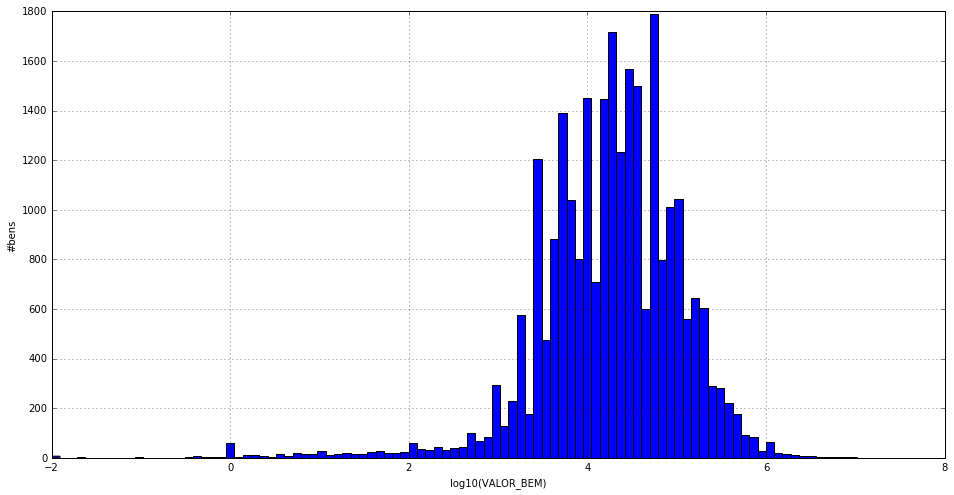

In [5]:
ax = df.VALOR_BEM.apply(np.log10).hist(bins=100, figsize=(16, 8))
ax.set_xlabel('log10(VALOR_BEM)')
ax.set_ylabel('#bens')

In [6]:
vbg = df.groupby('TIPO_BEM_CANDIDATO').VALOR_BEM\
.apply(lambda x: pd.Series({'qtd':x.count(), 'min':x.min(), 'max':x.max(), 'mean':x.mean(), 'std':x.std()}))\
.unstack()

In [47]:
vbg.applymap(lambda x: "{:,.2f}".format(x))

,max,mean,min,qtd,std
TIPO_BEM_CANDIDATO,,,,,
Aeronave,"28,000.00","28,000.00","28,000.00",1.00,nan
Apartamento,"3,620,501.57","246,284.52",600.00,715.00,"331,685.73"
"Aplicação de renda fixa (CDB, RDB e outros)","2,182,486.00","63,722.33",1.14,262.00,"175,456.56"
Ações (inclusive as provenientes de linha telefônica),"10,092,334.84","491,430.79",2.00,59.00,"1,702,877.98"
Bem relacionado com o exercício da atividade autônoma,"600,000.00","49,496.09","1,000.00",87.00,"87,563.80"
Benfeitorias,"643,508.75","87,994.65",700.00,25.00,"141,231.64"
Caderneta de poupança,"860,000.00","18,050.22",0.01,753.00,"52,936.58"
Casa,"6,000,000.00","112,810.24",0.01,"3,831.00","169,863.10"
Construção,"888,260.00","144,024.18","15,000.00",37.00,"191,210.93"


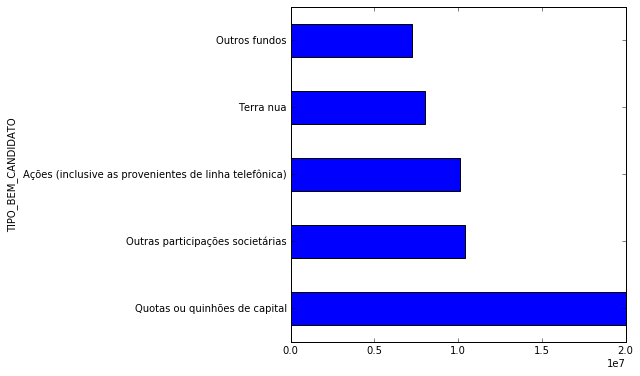

In [8]:
vbg['max'].nlargest(5).plot(kind='barh', figsize=(6, 6))

In [42]:
def only_outliers(row):
    
    vbg_row = vbg.loc[row['TIPO_BEM_CANDIDATO']]
    
    mean_tipo_bem = vbg_row['mean']
    std_tipo_bem = vbg_row['std']
    
    return np.abs((row['VALOR_BEM'] - std_tipo_bem)) > 2*std_tipo_bem

In [43]:
df_out = df[df.apply(only_outliers, axis=1)]

In [44]:
df_out.shape

(373, 4)

In [45]:
df_out[df_out.TIPO_BEM_CANDIDATO == 'Quotas ou quinhões de capital']\
.sort_values('VALOR_BEM')

,SQ_CANDIDATO,TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,VALOR_BEM
907,60000001634,Quotas ou quinhões de capital,QUOTAS DE CAPITAL NA EMPRESA CONSTRUTORA S & V LTDA CNPJ 07.419.365/0001-02,2976000.0
17791,60000011302,Quotas ou quinhões de capital,EMPRESA JJ EMPREENDIMENTOS LTDA - PERCENTUAL DE 90% DAS QUOTAS,3204000.0
7011,60000004669,Quotas ou quinhões de capital,50% DAS QUOTAS DO CAPITAL DA EMPRESA ENGEXATA ENGENHARIA LTDA,3250000.0
4239,60000003287,Quotas ou quinhões de capital,COTAS DE CAPITAL DA FIRMA ICEVA CERAMICA VALE DO ACARAÚ LTDA EM NOME DA CONJUGE,4000000.0
18419,60000011679,Quotas ou quinhões de capital,QUOTAS DE CAPITAL (JUNTO C/ CONJUGUE) COMPESCAL COM. DE PESC. ARAC. LTDA - CGC 07.108.145/0001-50 CAPITAL SOCIAL AUMENTADO COM LUCROS ACUMULADOS,15993630.0
11584,60000007189,Quotas ou quinhões de capital,QUOTAS NA EMPRESA CMACK,20000000.0


In [64]:
is_veiculo = df.TIPO_BEM_CANDIDATO == 'Veículo automotor terrestre: caminhão, automóvel, moto, etc.'
is_lt_5k = df.VALOR_BEM < 5000
df[is_veiculo & is_lt_5k].sort_values('VALOR_BEM').head(10)

,SQ_CANDIDATO,TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,VALOR_BEM
23598,60000015032,"Veículo automotor terrestre: caminhão, automóvel, moto, etc.",UM CARRO ESCORT XR3 VENDIDO PARA SUCATA A VARIOS ANOS,1.00
25737,60000016480,"Veículo automotor terrestre: caminhão, automóvel, moto, etc.",UM CARRO MODELO VOYAGE ANO 2013 PLACA DRV5694,1.00
14629,60000009015,"Veículo automotor terrestre: caminhão, automóvel, moto, etc.",MOTO HONDA/NXR150 BROS ES ANO 2009 COR PRETA,4.00
11608,60000007198,"Veículo automotor terrestre: caminhão, automóvel, moto, etc.","MOTO SHINERAY 49 CC, JET",4.00
19719,60000012478,"Veículo automotor terrestre: caminhão, automóvel, moto, etc.",TENHO UM VEICULO DE MARCA BELINA DEL REY ANO 91 DE PLACA - HUI 2823,5.00
19715,60000012476,"Veículo automotor terrestre: caminhão, automóvel, moto, etc.","CARRO MARCA MERCERDES BENZ CLASSE A 160, ANO 2000 PLACA HWE 0803",10.00
25063,60000016042,"Veículo automotor terrestre: caminhão, automóvel, moto, etc.","AUTOMOVEL FIAT PALIO ANO 2004 NO VALOR DE R$ 15.000,00",15.00
14573,60000008978,"Veículo automotor terrestre: caminhão, automóvel, moto, etc.","POSSUO UM CARRO VOYAGE DE COR CINZA, ANO 2009 MODELO 2010 COM A OLACA HMJ 4447",20.00
15161,60000009436,"Veículo automotor terrestre: caminhão, automóvel, moto, etc.","01 CARRO FIAT/PALIO FIRE ANO 2011/2012, PLACA: OCJ 7192",20.00
25876,60000016565,"Veículo automotor terrestre: caminhão, automóvel, moto, etc.",1 VEICULO PRISMA 1.0 ANO 2013 COR PRATA,35.94


# RS, que dados ruins...